In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
raw_data = pd.read_csv('./datasets/samsung200101_220328.KS.csv')
print(raw_data.head())
raw_data.info()

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
1  2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2  2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
3  2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.406250  10009778
4  2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.242188  23501171
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       551 non-null    object 
 1   Open       551 non-null    float64
 2   High       551 non-null    float64
 3   Low        551 non-null    float64
 4   Close      551 non-null    float64
 5   Adj Close  551 non-null    float64
 6   Volume     551 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 30.3+ KB


In [8]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace= True)
print(raw_data.head())


KeyError: ignored

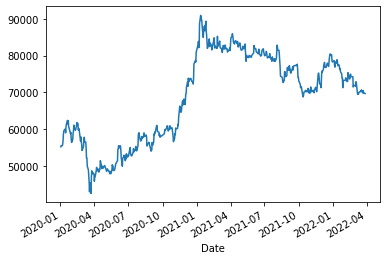

In [10]:
raw_data['Close'].plot()
plt.show()

In [11]:
data_test = raw_data.sort_values('Close')
print(data_test.head())
print(data_test.tail())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-03-23  42600.0  43550.0  42400.0  42500.0  39900.804688  41701626
2020-03-19  46400.0  46650.0  42300.0  42950.0  40323.277344  56925513
2020-03-20  44150.0  45500.0  43550.0  45400.0  42623.441406  49730008
2020-03-18  47750.0  48350.0  45600.0  45600.0  42811.214844  40152623
2020-04-01  47450.0  47900.0  45800.0  45800.0  43316.453125  27259532
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-01-25  87000.0  89900.0  86300.0  89400.0  87796.445313  27258534
2021-01-13  89800.0  91200.0  89100.0  89700.0  88091.062500  36068848
2021-01-14  88700.0  90000.0  88700.0  89700.0  88091.062500  26393970
2021-01-12  90300.0  91400.0  87800.0  90600.0  88974.914063  48682416
2021-01-11  90000.0  96800.0  89500.0  91000.0  89367.734375  90306177


In [28]:
data_close = raw_data[['Close']]
data_close.info()
print(data_close.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2020-01-02 to 2022-03-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   551 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB
              Close
Date               
2020-01-02  55200.0
2020-01-03  55500.0
2020-01-06  55500.0
2020-01-07  55800.0
2020-01-08  56800.0


In [25]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data_close)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.26185567]
 [0.26804124]
 [0.26804124]
 [0.2742268 ]
 [0.29484536]]
(551, 1)


In [21]:
sequence_X = []
sequence_Y = []

for i in range(len(scaled_data)-30): #30개의 data를 가지고 비교
  x = scaled_data[i:i+30] #scaled_data 30개 중 Close만
  y = scaled_data[i+30] # 30개를 기준으로 그 다음날의 Close
  sequence_X.append(x)
  sequence_Y.append(y)
print(sequence_X[:5])
print(sequence_Y[:5])

[array([[0.26185567],
       [0.26804124],
       [0.26804124],
       [0.2742268 ],
       [0.29484536],
       [0.33195876],
       [0.35051546],
       [0.36082474],
       [0.36082474],
       [0.34020619],
       [0.37525773],
       [0.38762887],
       [0.41030928],
       [0.38969072],
       [0.40824742],
       [0.37731959],
       [0.33608247],
       [0.34226804],
       [0.30309278],
       [0.28659794],
       [0.30309278],
       [0.33814433],
       [0.35051546],
       [0.38350515],
       [0.36907216],
       [0.35463918],
       [0.35876289],
       [0.37113402],
       [0.37525773],
       [0.39793814]]), array([[0.26804124],
       [0.26804124],
       [0.2742268 ],
       [0.29484536],
       [0.33195876],
       [0.35051546],
       [0.36082474],
       [0.36082474],
       [0.34020619],
       [0.37525773],
       [0.38762887],
       [0.41030928],
       [0.38969072],
       [0.40824742],
       [0.37731959],
       [0.33608247],
       [0.34226804],
       [0.

In [32]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.26185567]
 [0.26804124]
 [0.26804124]
 [0.2742268 ]
 [0.29484536]
 [0.33195876]
 [0.35051546]
 [0.36082474]
 [0.36082474]
 [0.34020619]
 [0.37525773]
 [0.38762887]
 [0.41030928]
 [0.38969072]
 [0.40824742]
 [0.37731959]
 [0.33608247]
 [0.34226804]
 [0.30309278]
 [0.28659794]
 [0.30309278]
 [0.33814433]
 [0.35051546]
 [0.38350515]
 [0.36907216]
 [0.35463918]
 [0.35876289]
 [0.37113402]
 [0.37525773]
 [0.39793814]]
[0.39175258]
(521, 30, 1)
(521, 1)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size = 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(416, 30, 1) (416, 1)
(105, 30, 1) (105, 1)


In [35]:
model = Sequential()
model.add(LSTM(50, input_shape=(30,1),
               activation = 'tanh')) #LSTM은 activation으로 tanh, tanh는 -1 ~ 1 사이의 값
model.add(Flatten())
model.add(Dense(1)) # 예측한 값을 그래도 써야 하기 때문에 마지막에는 activation을 사용하지 않는다
model.compile(loss = 'mse', optimizer='adam') # 분류가 아니므로 metrics를 안 쓴다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [36]:
fit_hist = model.fit(X_train, Y_train, epochs = 100, 
                     validation_data = (X_test, Y_test), shuffle = False) # 매 epoch 마다 validation_data의 값만큼 뽑아 loss 값만 검증,(X_test, Y_test)에 back를 하지 않아 학습(수정)하지 않는다. 
                     #but forward에서 data 가 많아 학습 효과가 좋다, shuffle = False=>data를 넣는 순서대로 한다.

Epoch 1/100
13/13 [==============================] - 3s 60ms/step - loss: 0.0782 - val_loss: 0.0207
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0090 - val_loss: 0.0112
Epoch 3/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 4/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 7/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 8/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 9/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0029

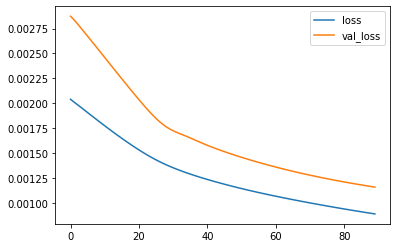

In [38]:
plt.plot(fit_hist.history['loss'][10:], label = 'loss')
plt.plot(fit_hist.history['val_loss'][10:], label = 'val_loss')
plt.legend()
plt.show()

In [39]:
model.save('./stock_close_predict.h5')

In [40]:
pred = model.predict(X_test)

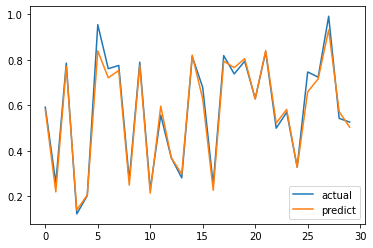

In [42]:
plt.plot(Y_test[:30], label = 'actual')
plt.plot(pred[:30], label = 'predict')
plt.legend()
plt.show()

In [44]:
last_data_30 = scaled_data[-30:].reshape(1, 30, 1)
today_close = model.predict(last_data_30)

print(today_close)

[[0.5658047]]


In [45]:
today_close_value = minmaxscaler.inverse_transform(today_close)
print(today_close_value)

[[69941.53]]


In [50]:
today_actual = 70200
today_actual = np.array(today_actual).reshape(1,1)
scaled_today_actual = minmaxscaler.transform(today_actual) # fit_transfrom -> minmaxscaler가 가지고 있는 min, max 정보가 달라진다.
print(scaled_today_actual)

[[0.57113402]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
last_data_29 = scaled_data[-29:]
last_data_30 = np.append(last_data_29,scaled_today_actual)
last_data_30= last_data_30.reshape(1,30,1)
print(last_data_30.shape)


(1, 30, 1)


In [56]:
tomorrow_pred = model.predict(last_data_30)
tomorrow_predicted_value = minmaxscaler.inverse_transform(tomorrow_pred)
print('%d'%tomorrow_predicted_value[0][0])

69987
